In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

In [ ]:
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_data.shape

In [ ]:
len(train_labels)

In [ ]:
train_labels

In [ ]:
test_data.shape

In [ ]:
len(test_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

1875/1875 [==============================] - 4s 2ms/step - loss: 2.9176 - accuracy: 0.8584
1875/1875 - 2s - loss: 0.4382 - accuracy: 0.8941 - 2s/epoch - 1ms/step
313/313 - 1s - loss: 0.5044 - accuracy: 0.8903 - 589ms/epoch - 2ms/step
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.9053
1875/1875 - 2s - loss: 0.3018 - accuracy: 0.9195 - 2s/epoch - 1ms/step
313/313 - 1s - loss: 0.3635 - accuracy: 0.9122 - 511ms/epoch - 2ms/step
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2891 - accuracy: 0.9254
1875/1875 - 2s - loss: 0.2131 - accuracy: 0.9402 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 0.2782 - accuracy: 0.9327 - 497ms/epoch - 2ms/step
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2442 - accuracy: 0.9360
1875/1875 - 2s - loss: 0.2212 - accuracy: 0.9400 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 0.2836 - accuracy: 0.9300 - 489ms/epoch - 2ms/step
1875/1875 [==============================] - 3s 2ms/step - loss:

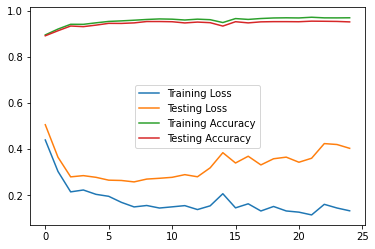

In [78]:
training_accuracy = []
testing_accuracy = []
training_loss = []
testing_loss = []

for _ in range(25):
    model.fit(train_data, train_labels, epochs=1)
    train_loss, train_acc = model.evaluate(train_data,  train_labels, verbose=2)
    test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
    training_accuracy.append(train_acc)
    testing_accuracy.append(test_acc)
    training_loss.append(train_loss)
    testing_loss.append(test_loss)

plt.plot(list(range(25)), training_loss)
plt.plot(list(range(25)), testing_loss)
plt.plot(list(range(25)), training_accuracy)
plt.plot(list(range(25)), testing_accuracy)
plt.legend(['Training Loss', 'Testing Loss', 'Training Accuracy', 'Testing Accuracy'])
plt.show()


In [79]:
predictions = tf.keras.Sequential([model, tf.keras.layers.Softmax()]).predict(test_data)

In [80]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Prediction: {}\n{:2.0f}% Sure\nReal: {}".format(predicted_label, 100*np.max(predictions_array), true_label), color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

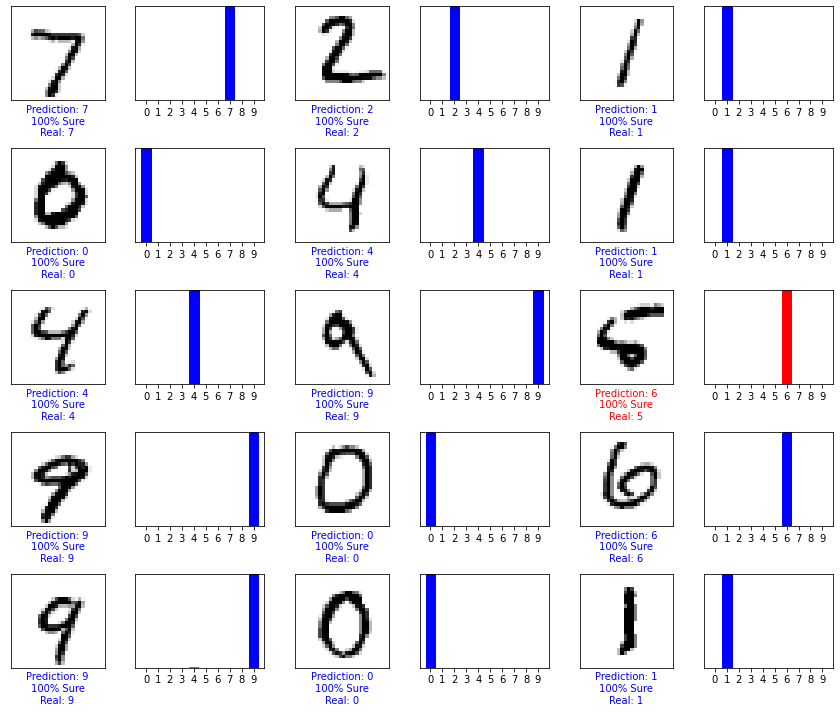

In [81]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

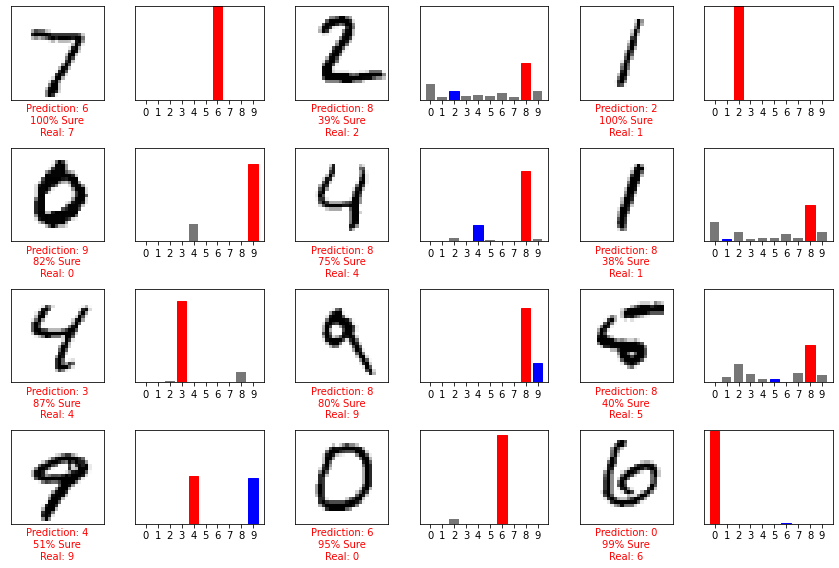

In [82]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
i = 0
for prediction, data, label in zip(predictions, test_data, test_labels):
  if np.argmax(prediction) != label:
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction, test_labels, test_data)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction, test_labels)
    i = i + 1
  if i >= num_images:
    break
plt.tight_layout()
plt.show()